In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import cv2
import glob
import random
import tqdm
from imgaug import augmenters as iaa
from sklearn.model_selection import train_test_split
from tensorflow.contrib.layers import flatten
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

%matplotlib inline

In [2]:
def visualizationImgs(x, y):
    cls, imgs = (np.unique(y, return_index=True))
    
    for i in range(len(cls)):
#             print(i)
            fig = plt.figure(figsize=(16, 14))
            plt.subplot(131)
            plt.imshow(x[i])
            plt.title('Label:'+str(y[i]))
#             print(i)
            plt.subplot(132)
            plt.imshow(x[i+1])
            plt.title('Label:'+str(y[i+1]))
            
            plt.subplot(133)
            plt.imshow(x[i+2])
            plt.title('Label:'+str(y[i+2]))
            
            i = i + 2
            
def classCount(y):
    sns.countplot(x=y)

def colorSpace(x, colorSpaces = [cv2.COLOR_RGB2HLS, cv2.COLOR_RGB2HSV, cv2.COLOR_RGB2YCrCb, cv2.COLOR_RGB2LAB]):
    for i in range(len(x)):
        fig = plt.figure(figsize=(16,12))
        
        plt.subplot(151)
        plt.imshow(x[i])
        plt.title('RGB')
        
        plt.subplot(152)
        plt.imshow(cv2.cvtColor(x[i], colorSpaces[0]))
        plt.title('HLS')

        plt.subplot(153)
        plt.imshow(cv2.cvtColor(x[i], colorSpaces[1]))
        plt.title('HSV')

        plt.subplot(154)
        plt.imshow(cv2.cvtColor(x[i], colorSpaces[2]))
        plt.title('YCrCb')

        plt.subplot(155)
        plt.imshow(cv2.cvtColor(x[i], colorSpaces[3]))
        plt.title('LAB')
        
def multiImage(x, aug_size = 3):
    
    total = aug_size + 1
    total_imgs = len(x) // total
    subplot_val = 100 + total*10 + 1
    for i in range(total_imgs):
        fig = plt.figure(figsize=(16,12))
        
        plt.subplot(subplot_val)
        plt.imshow(x[i])
        plt.title(subplot_val)
        subplot_val = subplot_val + 1
        
        plt.subplot(subplot_val)
        plt.imshow(x[i+1])
        plt.title(subplot_val)
        subplot_val = subplot_val + 1
        
        plt.subplot(subplot_val)
        plt.imshow(x[i+2])
        plt.title(subplot_val)
        subplot_val = subplot_val + 1
        
        plt.subplot(subplot_val)
        plt.imshow(x[i+3])
        plt.title(subplot_val)
        subplot_val = 100 + total*10 + 1

def preprocessKey(key):
    splits = key.split(',')
#     single = key.contains('[]')
    if '[' not in key:
        if 'A' in key:
            return "None"
        if 'S' in key:
            return "None"
        if 'D' in key:
            return "None"
        return key[0]#.replace('[','').replace(']','')
    else:
        splits = "".join(sorted(key.replace('[','').replace(']','').split(',')))
        if(splits == "AW"):
            return "Q"
        if(splits == "DW"):
            return "E"
        else:
            return "None"

In [3]:
df = pd.read_csv("Data.csv", names=["Images","Key1", "Key2"])
df.head()

,Images,Key1,Key2
0,training_images/frameCount00839.jpg,W,W
1,training_images/frameCount00845.jpg,W,W
2,training_images/frameCount00847.jpg,W,W
3,training_images/frameCount00848.jpg,W,W
4,training_images/frameCount00850.jpg,W,W


In [4]:
df['Key'] =  df['Key1'] + "," + df['Key2']
print(df.head())
df['Key'] = df['Key'].apply(preprocessKey)

print(df.head())
df['imgPath'] = df["Images"]


                                Images Key1 Key2  Key
0  training_images/frameCount00839.jpg    W    W  W,W
1  training_images/frameCount00845.jpg    W    W  W,W
2  training_images/frameCount00847.jpg    W    W  W,W
3  training_images/frameCount00848.jpg    W    W  W,W
4  training_images/frameCount00850.jpg    W    W  W,W
                                Images Key1 Key2 Key
0  training_images/frameCount00839.jpg    W    W   W
1  training_images/frameCount00845.jpg    W    W   W
2  training_images/frameCount00847.jpg    W    W   W
3  training_images/frameCount00848.jpg    W    W   W
4  training_images/frameCount00850.jpg    W    W   W


In [5]:
df.head()

,Images,Key1,Key2,Key,imgPath
0,training_images/frameCount00839.jpg,W,W,W,training_images/frameCount00839.jpg
1,training_images/frameCount00845.jpg,W,W,W,training_images/frameCount00845.jpg
2,training_images/frameCount00847.jpg,W,W,W,training_images/frameCount00847.jpg
3,training_images/frameCount00848.jpg,W,W,W,training_images/frameCount00848.jpg
4,training_images/frameCount00850.jpg,W,W,W,training_images/frameCount00850.jpg


In [6]:
flipper = iaa.Fliplr(1.0)
blurer = iaa.GaussianBlur(1.0)
saltpepper = iaa.SaltAndPepper(0.05)

In [7]:
imgs = []
y = []
imgs_path = glob.glob('outputimg/*.jpg')
if(len(imgs_path) != len(df)):
    print("Data is not in sync between images and csv.")
else:
    print("Data is in sync between images and csv.")

for ind, row in df.iterrows():
    exts = os.path.isfile(row['imgPath'])
    if(exts):
        img = plt.imread(row['imgPath'])
        imgs.append(img)
        #Augment Data
        imgs.append(flipper.augment_image(img))
        imgs.append(blurer.augment_image(img))
        imgs.append(saltpepper.augment_image(img))

        y.append(row['Key'])
        y.append(row['Key'])
        y.append(row['Key'])
        y.append(row['Key'])


Data is not in sync between images and csv.


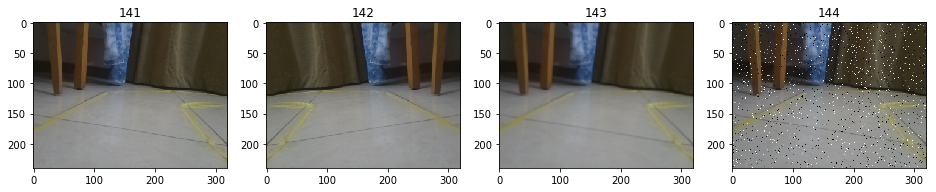

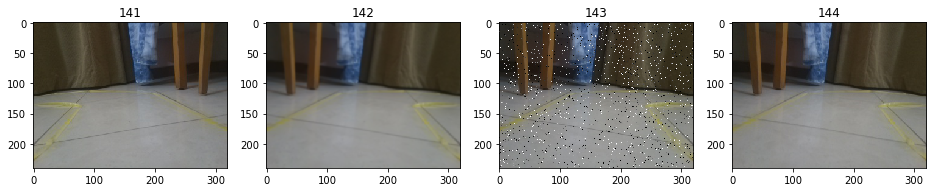

In [8]:
multiImage(imgs[:8], 3)

In [9]:
# TODO: Fill this in based on where you saved the training and testing data
lbl = LabelEncoder()
y = lbl.fit_transform(y)

X_train, x_test, y_train, y_test = train_test_split(imgs, y, test_size=0.3)
    
X_test, X_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.3)

print("Data Splitted into training and testing!")

Data Splitted into training and testing!


In [10]:
# Number of training examples
n_train = np.shape(X_train)[0]

# Number of validation examples
n_validation = np.shape(X_valid)[0]

# Number of testing examples.
n_test = np.shape(X_test)[0]

# What's the shape of an traffic sign image?
image_shape = np.shape(X_train[0])

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 1862
Number of validation examples = 240
Number of testing examples = 558
Image data shape = (240, 320, 3)
Number of classes = 4


In [11]:
#Shuffle Data

X_train, y_train = shuffle(X_train, y_train)
# y_train = tf.one_hot(y_train, n_classes, 1.0, 0.0)

In [12]:
#setting the hyperparameters, no of iterations and batch_size
EPOCHS = 3
BATCH_SIZE = 128

### Model Architecture

In [13]:

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W= tf.Variable(tf.truncated_normal(shape=(5,5,3,6), mean=mu, stddev=sigma))
    conv1_b= tf.Variable(tf.zeros(6))
    conv1= tf.nn.conv2d(x,conv1_W,strides=[1,1,1,1],padding='VALID',use_cudnn_on_gpu=True, name='Conv1') + conv1_b

    # Activation.
    conv1= tf.nn.relu(conv1)

    # Layer 2: Convolutional. Input = 28x28x6. Output = 14x14x10.
    conv3_W= tf.Variable(tf.truncated_normal(shape=(5,5,6,10), mean=mu, stddev=sigma))
    conv3_b= tf.Variable(tf.zeros(10))
    conv3= tf.nn.conv2d(conv1,conv3_W,strides=[1,2,2,1],padding='VALID',use_cudnn_on_gpu=True, name='Conv2') + conv3_b

    # Activation.
    conv3= tf.nn.relu(conv3)

    # Layer 3: Convolutional. Input = 14x14x10. Output = 8x8x16.
    conv2_W= tf.Variable(tf.truncated_normal(shape=(5,5,10,16),mean=mu,stddev=sigma))
    conv2_b=tf.Variable(tf.zeros(16))
    conv2= tf.nn.conv2d(conv3,conv2_W,strides=[1,1,1,1],padding='VALID',use_cudnn_on_gpu=True, name='Conv3') + conv2_b
    
    # Activation.
    conv2= tf.nn.relu(conv2)

    # Pooling. Input = 8x8x16. Output = 4x4x16.
    conv2= tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

    # Flatten. Input = 4x4x16. Output = 256.
    f= flatten(conv2)

    # Layer 4: Fully Connected. Input = 256. Output = 120.
    fc1_W= tf.Variable(tf.truncated_normal(shape=(int(np.shape(f)[1]),120),mean=mu,stddev=sigma))
    fc1_b= tf.Variable(tf.zeros(shape=120))
    fc1= tf.matmul(f,fc1_W) + fc1_b
    
    # Activation.
    fc1= tf.nn.relu(fc1)
    
    # Introduce Dropout after first fully connected layer
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 5: Fully Connected. Input = 120. Output = 100.
    fc2_W= tf.Variable(tf.truncated_normal(shape=(120,100),mean=mu,stddev=sigma))
    fc2_b= tf.Variable(tf.zeros(100))
    fc2= tf.matmul(fc1,fc2_W) + fc2_b
    
    # Activation.
    fc2= tf.nn.relu(fc2)
    
    # Layer 6: Fully Connected. Input = 100. Output = 84.
    fc4_W= tf.Variable(tf.truncated_normal(shape=(100,84),mean=mu,stddev=sigma))
    fc4_b= tf.Variable(tf.zeros(84))
    fc4= tf.matmul(fc2,fc4_W) + fc4_b
    
    # Activation.
    fc4= tf.nn.relu(fc4)
    
    # Layer 7: Fully Connected. Input = 84. Output = 43.
    fc3_W= tf.Variable(tf.truncated_normal(shape=(84,n_classes),mean=mu,stddev=sigma))
    fc3_b= tf.Variable(tf.zeros(n_classes))
    fc3= tf.matmul(fc4,fc3_W) + fc3_b
    logits=fc3
        
    return logits

In [14]:
def createModelTensorflow(input_dim, n_conv = 3, conv_shape = [[24,5],[36,5],[48,5]], n_fc = 3, fc_count = [120,80,40], n_output = 10, dropout = [0,0.5,0],maxpool = [0,0,0], copping_dim = ((50,50),(0,0))): 
    dropCount = 0
    x = input_dim#tf.reshape(x, shape=[-1, 28, 28, 1])
    for i in range(n_conv):
        if(i == 0):
            conv1 = tf.layers.conv2d(x, conv_shape[i][0], conv_shape[i][0], activation=tf.nn.relu, padding='same')
        else:
            conv = tf.layers.conv2d(conv1, 32, 5, activation=tf.nn.relu, padding='same')
        if(dropout[i] > 0):
            conv = tf.layers.dropout(conv, rate = dropout[i])
            dropCount = dropCount + 1
        if(maxpool[i]):
            conv = tf.layers.max_pooling2d(conv, 2, 2)
    conv_output = tf.contrib.layers.flatten(conv)
    fc = tf.layers.dense(conv_output, fc_count[i], activation=tf.nn.relu)
    for i in range(n_fc-1):
        fc = tf.layers.dense(fc, fc_count[i+1], activation=tf.nn.relu)
    output = tf.layers.dense(fc, n_output, activation=tf.nn.softmax)
    return output
            

In [15]:
shape = X_train[0].shape

x = tf.placeholder(tf.float32, (None, shape[0], shape[1], shape[2]), name='x')
y = tf.placeholder(tf.int32, (None), name='y')
one_hot_y = tf.one_hot(y, n_classes) # one hot encoding for output labels
keep_prob = tf.placeholder(tf.float32, name='kp') # defining the dropout probability after fully connected layer in the architecture
print('Variables initialized successfully')

Variables initialized successfully


### Train, Validate and Test the Model

In [ ]:
rate = 0.0009 #learning rate

#defining various operations
# logits = LeNet(x) 
# logits = convnet_deep(x)
logits =  createModelTensorflow(x, n_conv = 3, conv_shape = [[4,5],[8,5],[12,5]], n_fc = 3, fc_count = [100,100,100], n_output = n_classes, dropout = [0,0.5,0],maxpool = [0,0,0], copping_dim = ((50,50),(0,0)))
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [17]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss=0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy,loss = sess.run([accuracy_operation,loss_operation],feed_dict={x: batch_x, y: batch_y,keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
        total_loss+= (loss*len(batch_x)) # getting the total loss to plot a graph later
    return total_accuracy / num_examples, total_loss/num_examples

In [18]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    loss_Acc=[]
    for i in range(5):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
#             print((batch_y))
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.5})
            print('Batch {:.1f}')
            
        validation_accuracy,loss_acc = evaluate(X_valid, y_valid)
       
        print("EPOCH {} ...".format(i+1))
        loss_Acc.append(loss_acc)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    saved = saver.save(sess, 'data/model.ckpt')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.525

EPOCH 2 ...
Validation Accuracy = 0.525

EPOCH 3 ...
Validation Accuracy = 0.525



KeyboardInterrupt: 

In [ ]:
# Check Test Accuracy

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy[0]))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

### Predict the Sign Type for Each Image and Analyze Performance

In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [ ]:
convLayer = ["Conv1:0","Conv2:0","Conv3:0"]
with tf.Session() as sess:
    saver.restore(sess, 'data/model.ckpt')
    i = 1
    for convName in convLayer:
        Conv1 = tf.get_default_graph().get_tensor_by_name(convName)
        outputFeatureMap(X_test[0:1], Conv1, plt_num = i)
        
        i = i + 1